## Search problem

In [19]:
from bs4 import BeautifulSoup as bs
import requests
import re

In [20]:
# 上海地铁百度百科
sh_metro_url = "https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%81/1273732?fr=aladdin"
headers = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36',
    'connection': 'keep-alive',
    'host': 'baike.baidu.com',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'zh-CN,zh;q=0.9,en;q=0.8',
    'upgrade-insecure-requests': '1'
}
page = requests.get(sh_metro_url, headers=headers)

In [21]:
content = page.content.decode('utf-8')
page.status_code

200

In [22]:
# soup = bs(content)
line_pattern = re.compile(r'<a target=_blank href="(/item/[\d\w%]+/\d+)" data-lemmaid="\d+">(上海[\w\d]+线)</a>')

In [23]:
all_lines = {}
for link, line in line_pattern.findall(content):
    if line in all_lines: continue
    all_lines[line] = 'https://baike.baidu.com' + link
all_lines

{'上海地铁1号线': 'https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF/12092650',
 '上海地铁2号线': 'https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%812%E5%8F%B7%E7%BA%BF/22947836',
 '上海地铁3号线': 'https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%813%E5%8F%B7%E7%BA%BF/22947837',
 '上海地铁4号线': 'https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%814%E5%8F%B7%E7%BA%BF/6310090',
 '上海地铁5号线': 'https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%815%E5%8F%B7%E7%BA%BF/22947838',
 '上海地铁6号线': 'https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%816%E5%8F%B7%E7%BA%BF/4316051',
 '上海地铁7号线': 'https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%817%E5%8F%B7%E7%BA%BF/538923',
 '上海地铁8号线': 'https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%818%E5%8F%B7%E7%BA%BF/12520383',
 '上海地铁9号线': 'https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%819%E5%8F%B7%E7%BA%BF/12423895',
 '上海地铁10号线': 'https://b

In [68]:
first_line = requests.get(all_lines['上海地铁5号线'], headers=headers)
first_line.status_code

200

In [69]:
c = first_line.content.decode('utf-8')

In [70]:
soup = bs(c)
station_pattern = re.compile(r'<td.+>([\w\d]+站)')

In [71]:
def get_stations(soup):
    stations = []
    for h3 in soup.find_all('h3'):
        if h3.contents[-1] != '车站列表': continue
        par = h3.parent
        for sib in par.next_siblings:
            if sib.name == 'table':
                for s in sib.children:
                    if s.contents:
                        stat = str(s.contents[0])
                        mat = station_pattern.search(stat)
                        if mat and len(mat.group(1)) < 10 and mat.group(1) != '车站': 
                            stations.append(mat.group(1))
                return stations

In [72]:
get_stations(soup)

['莘庄站',
 '春申路站',
 '银都路站',
 '颛桥站',
 '北桥站',
 '剑川路站',
 '东川路站',
 '江川路站',
 '西渡站',
 '萧塘站',
 '奉浦大道站',
 '环城东路站',
 '望园路站',
 '金海湖站',
 '奉贤新城站',
 '金平路站',
 '华宁路站',
 '文井路站',
 '闵行开发区站']

In [73]:
from collections import defaultdict

In [74]:
def get_all_stations(lines):
    all_stations = defaultdict(list)
    for line, url in lines.items():
        resp = requests.get(url, headers=headers)
        contents = resp.content.decode('utf-8')
        soup = bs(contents)
        stations = get_stations(soup)
        all_stations[line].extend(stations)
    return all_stations

In [75]:
all_stations = get_all_stations(all_lines)

In [76]:
for line, stations in all_stations.items():
    print("{line}一共有{stations}个站".format(line=line, stations=len(stations)))

上海地铁1号线一共有28个站
上海地铁2号线一共有30个站
上海地铁3号线一共有29个站
上海地铁4号线一共有27个站
上海地铁5号线一共有19个站
上海地铁6号线一共有28个站
上海地铁7号线一共有33个站
上海地铁8号线一共有30个站
上海地铁9号线一共有35个站
上海地铁10号线一共有31个站
上海地铁11号线一共有39个站
上海地铁12号线一共有32个站
上海地铁13号线一共有31个站
上海地铁16号线一共有13个站
上海地铁17号线一共有13个站
上海地铁浦江线一共有6个站
上海磁浮列车示范运营线一共有2个站


* 4号线为环线
* 5号线平庄公路站，缺少奉浦大道站，由于百度百科的站字和奉浦大道4个字隔开了，导致没有匹配到
* 11号线陈翔路站尚未开通

In [77]:
# 对4号线、5号线和11号线做特殊处理
#idx = all_stations['上海地铁5号线'].index('环城东路站')
#all_stations['上海地铁5号线'].insert(idx, '奉浦大道站')
#all_stations['上海地铁5号线'].remove('平庄公路站')
all_stations['上海地铁4号线'].pop()       # 环线首尾站一样
all_stations['上海地铁11号线'].remove('陈翔路站')

In [78]:
# 处理5号线的支线
all_stations['上海地铁5号线主线'] = all_stations['上海地铁5号线'][:15]
all_stations['上海地铁5号线支线'] = all_stations['上海地铁5号线'][15:]
all_stations.pop('上海地铁5号线')

['莘庄站',
 '春申路站',
 '银都路站',
 '颛桥站',
 '北桥站',
 '剑川路站',
 '东川路站',
 '江川路站',
 '西渡站',
 '萧塘站',
 '奉浦大道站',
 '环城东路站',
 '望园路站',
 '金海湖站',
 '奉贤新城站',
 '金平路站',
 '华宁路站',
 '文井路站',
 '闵行开发区站']

In [79]:
#  处理10号线和11号线的支线段
all_stations['上海地铁11号线主线'] = all_stations['上海地铁11号线'][7:]
all_stations['上海地铁11号线支线'] = all_stations['上海地铁11号线'][:7] + [all_stations['上海地铁11号线'][10]]
all_stations.pop('上海地铁11号线')

['花桥站',
 '光明路站',
 '兆丰路站',
 '安亭站',
 '上海汽车城站',
 '昌吉东路站',
 '上海赛车场站',
 '嘉定北站',
 '嘉定西站',
 '白银路站',
 '嘉定新城站',
 '马陆站',
 '南翔站',
 '桃浦新村站',
 '武威路站',
 '祁连山路站',
 '李子园站',
 '上海西站站',
 '真如站',
 '枫桥路站',
 '曹杨路站',
 '隆德路站',
 '江苏路站',
 '交通大学站',
 '徐家汇站',
 '上海游泳馆站',
 '龙华站',
 '云锦路站',
 '龙耀路站',
 '东方体育中心站',
 '三林站',
 '三林东站',
 '浦三路站',
 '御桥站',
 '罗山路站',
 '秀沿路站',
 '康新公路站',
 '迪士尼站']

In [80]:
all_stations['上海地铁10号线主线'] = all_stations['上海地铁10号线'][3:]
all_stations['上海地铁10号线支线'] = all_stations['上海地铁10号线'][:3] + [all_stations['上海地铁10号线'][7]]
all_stations.pop('上海地铁10号线')

['航中路站',
 '紫藤路站',
 '龙柏新村站',
 '虹桥火车站站',
 '虹桥2号航站楼站',
 '虹桥1号航站楼站',
 '上海动物园站',
 '龙溪路站',
 '水城路站',
 '伊犁路站',
 '宋园路站',
 '虹桥路站',
 '交通大学站',
 '上海图书馆站',
 '陕西南路站',
 '新天地站',
 '老西门站',
 '豫园站',
 '南京东路站',
 '天潼路站',
 '四川北路站',
 '海伦路站',
 '邮电新村站',
 '四平路站',
 '同济大学站',
 '国权路站',
 '五角场站',
 '江湾体育场站',
 '三门路站',
 '殷高东路站',
 '新江湾城站']

In [81]:
for line, stations in all_stations.items():
    print("{line}一共有{stations}个站".format(line=line, stations=len(stations)))

上海地铁1号线一共有28个站
上海地铁2号线一共有30个站
上海地铁3号线一共有29个站
上海地铁4号线一共有26个站
上海地铁6号线一共有28个站
上海地铁7号线一共有33个站
上海地铁8号线一共有30个站
上海地铁9号线一共有35个站
上海地铁12号线一共有32个站
上海地铁13号线一共有31个站
上海地铁16号线一共有13个站
上海地铁17号线一共有13个站
上海地铁浦江线一共有6个站
上海磁浮列车示范运营线一共有2个站
上海地铁5号线主线一共有15个站
上海地铁5号线支线一共有4个站
上海地铁11号线主线一共有31个站
上海地铁11号线支线一共有8个站
上海地铁10号线主线一共有28个站
上海地铁10号线支线一共有4个站


In [82]:
# 获取经纬度
long_lat_url = 'http://service.shmetro.com/skin/js/pca.js'
resp = requests.get(long_lat_url, headers=headers)
resp.status_code

200

In [83]:
stations_long_lat = resp.content.decode('utf-8')

In [84]:
long_lat_pat = re.compile(r'var gis = \{(.*?)\}', re.S)
station_pat = re.compile(r'var stations = \{(.*?)\}', re.S)

In [85]:
long_lat = long_lat_pat.findall(stations_long_lat)
stations = station_pat.findall(stations_long_lat)

In [86]:
id_name_map = {}
for item in stations[0].split(','):
    id_, name = item.split(':')
    id_name_map[id_[1:-1]] = name[1:-1]
id_name_map

{'0111': '莘庄',
 '0112': '外环路',
 '0113': '莲花路',
 '0114': '锦江乐园',
 '0115': '上海南站',
 '0116': '漕宝路',
 '0117': '上海体育馆',
 '0118': '徐家汇',
 '0119': '衡山路',
 '0120': '常熟路',
 '0121': '陕西南路',
 '0122': '黄陂南路',
 '0123': '人民广场',
 '0124': '新闸路',
 '0125': '汉中路',
 '0126': '上海火车站',
 '0127': '中山北路',
 '0128': '延长路',
 '0129': '上海马戏城',
 '0130': '汶水路',
 '0131': '彭浦新村',
 '0132': '共康路',
 '0133': '通河新村',
 '0134': '呼兰路',
 '0135': '共富新村',
 '0136': '宝安公路',
 '0137': '友谊西路',
 '0138': '富锦路',
 '0234': '徐泾东',
 '0235': '虹桥火车站',
 '0236': '虹桥2号航站楼',
 '0237': '淞虹路',
 '0238': '北新泾',
 '0239': '威宁路',
 '0240': '娄山关路',
 '0241': '中山公园',
 '0242': '江苏路',
 '0243': '静安寺',
 '0244': '南京西路',
 '0245': '人民广场',
 '0246': '南京东路',
 '0247': '陆家嘴',
 '0248': '东昌路',
 '0249': '世纪大道',
 '0250': '上海科技馆',
 '0251': '世纪公园',
 '0252': '龙阳路',
 '0253': '张江高科',
 '0254': '金科路',
 '0255': '广兰路',
 '0256': '唐镇',
 '0257': '创新中路',
 '0258': '华夏东路',
 '0259': '川沙',
 '0260': '凌空路',
 '0261': '远东大道',
 '0262': '海天三路',
 '0263': '浦东国际机场',
 '0311': '上海南站',
 '0312': '石龙路',
 '

In [87]:
id_long_lat_map = {}
lo_la_pat = re.compile(r'"(\d+)":"(\d+\.\d+),(\d+\.\d+)"')
for id_, long, lat in lo_la_pat.findall(long_lat[0]):
    id_long_lat_map[id_] = (float(long), float(lat))
id_long_lat_map

{'0111': (121.391832, 31.116809),
 '0112': (121.399814, 31.126929),
 '0113': (121.409334, 31.136734),
 '0114': (121.42068, 31.148312),
 '0115': (121.43627, 31.161142),
 '0116': (121.44187, 31.175383),
 '0117': (121.442801, 31.188348),
 '0118': (121.444749, 31.199152),
 '0119': (121.453247, 31.211777),
 '0120': (121.457719, 31.219937),
 '0121': (121.466688, 31.223492),
 '0122': (121.479798, 31.228753),
 '0123': (121.48085, 31.23868),
 '0124': (121.474802, 31.244699),
 '0125': (121.465, 31.247808),
 '0126': (121.462366, 31.253608),
 '0127': (121.465616, 31.265275),
 '0128': (121.461893, 31.27806),
 '0129': (121.458503, 31.285845),
 '0130': (121.456458, 31.29917),
 '0131': (121.455097, 31.312943),
 '0132': (121.453464, 31.325355),
 '0133': (121.447817, 31.337798),
 '0134': (121.444185, 31.345991),
 '0135': (121.440458, 31.361557),
 '0136': (121.437357, 31.376207),
 '0137': (121.434336, 31.38774),
 '0138': (121.43103, 31.398683),
 '0234': (121.307524, 31.195431),
 '0235': (121.32795, 31.19

In [88]:
len(id_name_map), len(id_long_lat_map)

(423, 313)

In [89]:
station_coordinates = defaultdict(tuple)
for id_, name in id_name_map.items():
    if id_ not in id_long_lat_map: continue
    station_coordinates[name+'站'] = id_long_lat_map[id_]
station_coordinates

defaultdict(tuple,
            {'莘庄站': (121.391832, 31.116809),
             '外环路站': (121.399814, 31.126929),
             '莲花路站': (121.409334, 31.136734),
             '锦江乐园站': (121.42068, 31.148312),
             '上海南站站': (121.437159, 31.159648),
             '漕宝路站': (121.44187, 31.175383),
             '上海体育馆站': (121.443402, 31.188814),
             '徐家汇站': (121.442314, 31.201202),
             '衡山路站': (121.453247, 31.211777),
             '常熟路站': (121.456628, 31.219964),
             '陕西南路站': (121.464494, 31.220991),
             '黄陂南路站': (121.479798, 31.228753),
             '人民广场站': (121.481738, 31.238695),
             '新闸路站': (121.474802, 31.244699),
             '汉中路站': (121.465, 31.247808),
             '上海火车站站': (121.46396, 31.255155),
             '中山北路站': (121.465616, 31.265275),
             '延长路站': (121.461893, 31.27806),
             '上海马戏城站': (121.458503, 31.285845),
             '汶水路站': (121.456458, 31.29917),
             '彭浦新村站': (121.455097, 31.312943),
           

In [90]:
# 舍弃掉没有经纬度的站
station_connection_info = defaultdict(list)
station_line_map = defaultdict(list)
for line, stations in all_stations.items():
    for i in range(len(stations)):
        station_line_map[stations[i]].append(line)
        if stations[i] not in station_coordinates: continue
        if i > 0 and stations[i-1] in station_coordinates:
            station_connection_info[stations[i]].append(stations[i-1])
        if i < len(stations)-1 and stations[i+1] in station_coordinates:
            station_connection_info[stations[i]].append(stations[i+1])
station_connection_info

defaultdict(list,
            {'莘庄站': ['外环路站', '春申路站'],
             '外环路站': ['莘庄站', '莲花路站'],
             '莲花路站': ['外环路站', '锦江乐园站'],
             '锦江乐园站': ['莲花路站', '上海南站站'],
             '上海南站站': ['锦江乐园站', '漕宝路站', '石龙路站'],
             '漕宝路站': ['上海南站站', '上海体育馆站', '龙漕路站'],
             '上海体育馆站': ['漕宝路站', '徐家汇站', '宜山路站', '上海体育场站'],
             '徐家汇站': ['上海体育馆站', '衡山路站', '肇嘉浜路站', '宜山路站', '交通大学站', '上海游泳馆站'],
             '衡山路站': ['徐家汇站', '常熟路站'],
             '常熟路站': ['衡山路站', '陕西南路站', '静安寺站', '肇嘉浜路站'],
             '陕西南路站': ['常熟路站', '黄陂南路站', '嘉善路站', '南京西路站', '上海图书馆站', '新天地站'],
             '黄陂南路站': ['陕西南路站', '人民广场站'],
             '人民广场站': ['黄陂南路站', '新闸路站', '南京东路站', '南京西路站', '大世界站', '曲阜路站'],
             '新闸路站': ['人民广场站', '汉中路站'],
             '汉中路站': ['新闸路站', '上海火车站站', '南京西路站', '曲阜路站'],
             '上海火车站站': ['汉中路站', '中山北路站', '中潭路站', '宝山路站', '宝山路站', '中潭路站'],
             '中山北路站': ['上海火车站站', '延长路站'],
             '延长路站': ['中山北路站', '上海马戏城站'],
             '上海马戏城站': ['延长路站', '汶水路站'],
    

In [91]:
station_line_map

defaultdict(list,
            {'莘庄站': ['上海地铁1号线', '上海地铁5号线主线'],
             '外环路站': ['上海地铁1号线'],
             '莲花路站': ['上海地铁1号线'],
             '锦江乐园站': ['上海地铁1号线'],
             '上海南站站': ['上海地铁1号线', '上海地铁3号线'],
             '漕宝路站': ['上海地铁1号线', '上海地铁12号线'],
             '上海体育馆站': ['上海地铁1号线', '上海地铁4号线'],
             '徐家汇站': ['上海地铁1号线', '上海地铁9号线', '上海地铁11号线主线'],
             '衡山路站': ['上海地铁1号线'],
             '常熟路站': ['上海地铁1号线', '上海地铁7号线'],
             '陕西南路站': ['上海地铁1号线', '上海地铁12号线', '上海地铁10号线主线'],
             '黄陂南路站': ['上海地铁1号线'],
             '人民广场站': ['上海地铁1号线', '上海地铁2号线', '上海地铁8号线'],
             '新闸路站': ['上海地铁1号线'],
             '汉中路站': ['上海地铁1号线', '上海地铁12号线', '上海地铁13号线'],
             '上海火车站站': ['上海地铁1号线', '上海地铁3号线', '上海地铁4号线'],
             '中山北路站': ['上海地铁1号线'],
             '延长路站': ['上海地铁1号线'],
             '上海马戏城站': ['上海地铁1号线'],
             '汶水路站': ['上海地铁1号线'],
             '彭浦新村站': ['上海地铁1号线'],
             '共康路站': ['上海地铁1号线'],
             '通河新村站': ['上海地铁1号线'],
          

In [92]:
len(station_coordinates), len(station_connection_info)

(261, 257)

In [93]:
import math

In [94]:
def geo_distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [95]:
def get_geo_distance(station1, station2):
    return geo_distance(station_coordinates[station1], station_coordinates[station2])

In [96]:
get_geo_distance('四平路站', '同济大学站')

0.6749695453122704

In [97]:
import networkx as nx

In [98]:
station_graph = nx.Graph()

In [99]:
station_graph.add_nodes_from(list(station_coordinates.keys()))

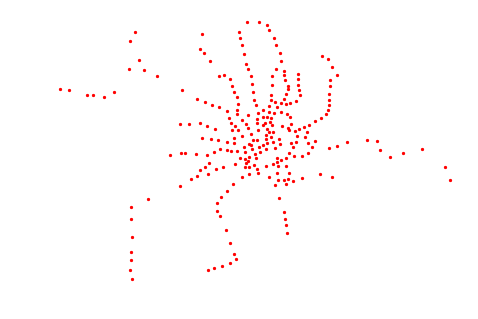

In [116]:
nx.draw(station_graph, station_coordinates, node_size=5)

In [101]:
station_with_road = nx.Graph(station_connection_info)

H:\Anaconda3\anzhuang\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


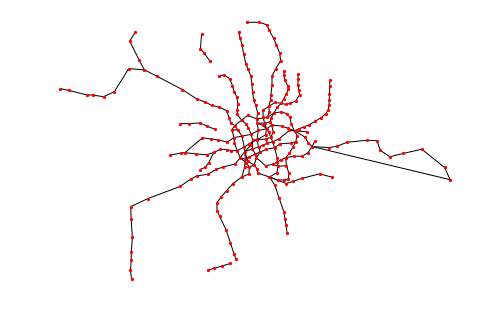

In [102]:
nx.draw(station_with_road, station_coordinates, node_size=5)

In [103]:
from collections import deque

In [104]:
def print_route(prev, start, destination):
    route = deque([destination])
    while prev[destination] != start:
        destination = prev[destination]
        route.appendleft(destination)
    route.appendleft(start)
    print('🚈'.join(route))

def search(start, destination, connection_graph):
    visited = {start}
    q = deque([start])
    prev = {}
    while q:
        station = q.popleft()
        for next_ in connection_graph[station]:
            if next_ in visited: continue
            prev[next_] = station
            if next_ == destination:
                print_route(prev, start, destination)
                return
            visited.add(next_)
            q.append(next_)
    print('无法到达！！！')


def search_bfs(start, destination, connection_graph):
    visited = set()
    routes = deque([[start]])
    while routes:
        cur = routes.pop()
        frontier = cur[-1]
        for next_ in connection_graph[frontier]:
            if next_ in visited or next_ in cur: continue
            new_route = cur + [next_]
            if next_ == destination: 
                print('🚈'.join(new_route))
                return 
            routes.appendleft(new_route)
        visited.add(frontier)
    print('无法到达！！！')
    

def search_dfs(start, destination, connection_graph):
    visited = set()
    routes = [[start]]
    while routes:
        cur = routes.pop()
        frontier = cur[-1]
        for next_ in connection_graph[frontier]:
            if next_ in visited or next_ in cur: continue
            new_route = cur + [next_]
            if next_ == destination: 
                print('🚈'.join(new_route))
                return 
            routes.append(new_route)
        visited.add(frontier)
    print('无法到达！！！')

In [105]:
search('同济大学站', '沈杜公路站', station_connection_info)

同济大学站🚈四平路站🚈邮电新村站🚈海伦路站🚈宝山路站🚈上海火车站站🚈汉中路站🚈南京西路站🚈陕西南路站🚈嘉善路站🚈大木桥路站🚈龙华中路站🚈龙华站🚈云锦路站🚈龙耀路站🚈东方体育中心站🚈凌兆新村站🚈芦恒路站🚈浦江镇站🚈江月路站🚈联航路站🚈沈杜公路站


In [106]:
search_bfs('同济大学站', '沈杜公路站', station_connection_info)

同济大学站🚈四平路站🚈邮电新村站🚈海伦路站🚈宝山路站🚈上海火车站站🚈汉中路站🚈南京西路站🚈陕西南路站🚈嘉善路站🚈大木桥路站🚈龙华中路站🚈龙华站🚈云锦路站🚈龙耀路站🚈东方体育中心站🚈凌兆新村站🚈芦恒路站🚈浦江镇站🚈江月路站🚈联航路站🚈沈杜公路站


In [107]:
search_dfs('同济大学站', '沈杜公路站', station_connection_info)

同济大学站🚈四平路站🚈邮电新村站🚈海伦路站🚈四川北路站🚈天潼路站🚈南京东路站🚈豫园站🚈老西门站🚈新天地站🚈陕西南路站🚈上海图书馆站🚈交通大学站🚈虹桥路站🚈宋园路站🚈伊犁路站🚈水城路站🚈龙溪路站🚈上海动物园站🚈虹桥1号航站楼站🚈虹桥2号航站楼站🚈淞虹路站🚈北新泾站🚈威宁路站🚈娄山关路站🚈中山公园站🚈金沙江路站🚈隆德路站🚈江苏路站🚈静安寺站🚈常熟路站🚈肇嘉浜路站🚈徐家汇站🚈上海游泳馆站🚈龙华站🚈云锦路站🚈龙耀路站🚈东方体育中心站🚈凌兆新村站🚈芦恒路站🚈浦江镇站🚈江月路站🚈联航路站🚈沈杜公路站


### 4 （Optional）Create different policies for transfer system

In [108]:
import heapq

In [109]:
def get_route(prev, start, destination):
    route = deque([destination])
    while prev[destination] != start:
        destination = prev[destination]
        route.appendleft(destination)
    route.appendleft(start)
    return route

def search_base_on_dijkstra(start, destination, connection_graph):
    """最短距离"""
    prev = {} # 记录上一站
    station_dist = {start: 0} # 记录某一站与起点的最近距离
    min_dist_heap = [[0, start]] # 小顶堆
    while min_dist_heap:
        dist, station = heapq.heappop(min_dist_heap) # 拿出当前距离起点最近的站点
        if station == destination:
            route = get_route(prev, start, destination)
            print('🚈'.join(route))
            return 
        for next_ in connection_graph[station]:
            tmp_dist = get_geo_distance(station, next_) + dist
            if next_ in station_dist and tmp_dist < station_dist[next_]: # 已经更新过则与原距离比较，更新则更新
                station_dist[next_] = tmp_dist
                prev[next_] = station
                for i in range(len(min_dist_heap)):
                    d, s = min_dist_heap[i]
                    if s == next_:
                        min_dist_heap[i][0] = tmp_dist
                        break
            elif next_ not in station_dist:
                heapq.heappush(min_dist_heap, [tmp_dist, next_])
                prev[next_] = station
                station_dist[next_] = tmp_dist
                
    print('无法到达！！！') 

In [110]:
search_base_on_dijkstra('同济大学站', '沈杜公路站', station_connection_info)

同济大学站🚈四平路站🚈邮电新村站🚈海伦路站🚈四川北路站🚈天潼路站🚈南京东路站🚈豫园站🚈老西门站🚈陆家浜路站🚈西藏南路站🚈中华艺术宫站🚈耀华路站🚈成山路站🚈杨思站🚈东方体育中心站🚈凌兆新村站🚈芦恒路站🚈浦江镇站🚈江月路站🚈联航路站🚈沈杜公路站


In [111]:
def get_transfer(route):
    """换乘次数"""
    count = 0
    for i in range(1,len(route)-1):
        if len(station_connection_info[route[i]]) <= 2: continue
        prev, after = station_line_map[route[i-1]], station_line_map[route[i+1]]
        # 主线支线不算换乘
        for j in range(len(prev)):
            if prev[j].endswith('主线') or prev[j].endswith('支线'):
                prev[j] = prev[j][:-2]
        for k in range(len(after)):
            if after[k].endswith('主线') or after[k].endswith('支线'):
                after[k] = after[k][:-2]
        if not set(prev) & set(after): count += 1
    return count
 
def get_distance(route):
    """距离"""
    distance = 0
    for i in range(1, len(route)):
        distance += get_geo_distance(route[i-1], route[i])
    return distance

def search_bfs(start, destination, connection_graph, strategy, by_way=[]):
#     visited = set()
    routes = [[start]]
    while routes:
        cur = routes.pop()
        frontier = cur[-1]
        for next_ in connection_graph[frontier]:
            if next_ in cur: continue
            new_route = cur + [next_]
            if next_ == destination: 
                for s in by_way:
                    if s not in new_route:
                        break
                else:
                    print('🚈'.join(new_route))
                    return
            else:
                routes.append(new_route)
        routes.sort(key=strategy, reverse=True)
#         visited.add(frontier)
    print('无法到达！！！')

In [112]:
search_bfs('同济大学站', '老西门站', station_connection_info, get_distance, by_way=['曲阳路站'])

同济大学站🚈四平路站🚈曲阳路站🚈虹口足球场站🚈西藏北路站🚈中兴路站🚈曲阜路站🚈人民广场站🚈大世界站🚈老西门站


In [113]:
search_bfs('同济大学站', '老西门站', station_connection_info, get_distance)

同济大学站🚈四平路站🚈邮电新村站🚈海伦路站🚈四川北路站🚈天潼路站🚈南京东路站🚈豫园站🚈老西门站


In [114]:
search_bfs('同济大学站', '宝山路站', station_connection_info, get_transfer, by_way=['东宝兴路站'])

同济大学站🚈四平路站🚈邮电新村站🚈海伦路站🚈四川北路站🚈天潼路站🚈南京东路站🚈豫园站🚈老西门站🚈新天地站🚈陕西南路站🚈南京西路站🚈人民广场站🚈曲阜路站🚈中兴路站🚈西藏北路站🚈虹口足球场站🚈东宝兴路站🚈宝山路站


In [115]:
search_bfs('同济大学站', '宝山路站', station_connection_info, get_transfer)

同济大学站🚈四平路站🚈邮电新村站🚈海伦路站🚈宝山路站


* 和高德地图进行分析比较
    1. 如果不使用 *by_way* 参数路程最短和最少换乘的结果基本与高德一致，但由于都是基于贪心并非全局最优，所以有时会不一样
    2. 使用了 *by_way* 之后，由于不能去除已访问过的站点搜索空间大大增加，一定程度上放大了基于贪心的缺点，更大概率和高德地图不一致，且运行时间随着距离增大而大大增加